<a href="https://colab.research.google.com/github/nisha1365/GEN-AI-POC/blob/main/Pediatric_BTM__120_16th_April.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tweet-preprocessor

In [2]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 22.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 18.6 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (7

In [3]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# import tweet preprocessor
import preprocessor as p

import nltk
import gensim
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from bertopic import BERTopic
#from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
#from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from bertopic.vectorizers import ClassTfidfTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
data= pd.read_csv("/content/pediatric_cleaned_tweets_12th_March.csv")
data

,file_name,tweet_id,text,author_id,conversation_id,created_at,lang,referenced_tweets_type,referenced_tweets_id,retweet_count,reply_count,like_count,quote_count,bookmark_count,impression_count,clean_text
0,search_recent_tweets_Pediatric Vaccines Popula...,1.721810e+18,"If your child is 2 or 3 years old, you can boo...",2.118604e+07,NaN,2023-11-07T09:00:27+00:00,en,0,0.000000e+00,1,0,1,0,0,401,"if your child is 2 or 3 years old, you can boo..."
1,search_recent_tweets_Pediatric Vaccines Popula...,1.721810e+18,@PhilipRafferty5 @logosaetos @jonathanstea @sp...,4.143503e+08,1.720000e+18,2023-11-07T08:34:23+00:00,en,replied_to,1.721780e+18,0,2,7,0,0,78,the age that children show signs of autism is ...
2,search_recent_tweets_Pediatric Vaccines Popula...,1.721810e+18,"- N40,820,564 for the payment of drugs and lab...",1.193120e+18,1.720000e+18,2023-11-07T08:24:42+00:00,en,replied_to,1.721810e+18,1,1,5,0,0,1082,"- n40,820,564 for the payment of drugs and lab..."
3,search_recent_tweets_Pediatric Vaccines Popula...,1.721800e+18,Influenza vaccination during pregnancy increas...,2.912624e+09,NaN,2023-11-07T08:20:29+00:00,en,quoted,1.721570e+18,54,6,189,7,25,15824,influenza vaccination during pregnancy increas...
4,search_recent_tweets_Pediatric Vaccines Popula...,1.721800e+18,The CDC confirmed the U.S.'s first pediatric f...,1.702840e+07,NaN,2023-11-07T08:20:08+00:00,en,0,0.000000e+00,0,0,2,0,0,2856,the cdc confirmed the u.s.'s first pediatric f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45964,search_recent_tweets_Pediatric Vaccines Produc...,1.766710e+18,@Acyn Because Republicans want to to back to t...,7.387860e+17,1.770000e+18,2024-03-10T06:09:49+00:00,en,replied_to,1.766620e+18,1,0,6,0,0,50,because republicans want to to back to the tim...
45965,search_recent_tweets_Pediatric Vaccines Produc...,1.766710e+18,The “Yea’s” don’t realize how terrible measles...,1.210380e+18,NaN,2024-03-10T06:09:27+00:00,en,quoted,1.766640e+18,4,1,6,0,0,523,the “yea’s” don’t realize how terrible measles...
45966,search_recent_tweets_Pediatric Vaccines Produc...,1.766710e+18,#ViksitBharatKiViksitNari\nOver 6 lakh pregnan...,1.358610e+18,NaN,2024-03-10T06:03:40+00:00,en,0,0.000000e+00,0,0,0,0,0,2,viksitbharatkiviksitnari over 6 lakh pregnant ...
45967,search_recent_tweets_Pediatric Vaccines Produc...,1.766710e+18,"I am so terrified of getting tetanus, I’ve see...",8.902920e+17,NaN,2024-03-10T06:03:12+00:00,en,quoted,1.766480e+18,0,0,1,0,0,214,"i am so terrified of getting tetanus, i’ve see..."


In [6]:
data.columns

Index(['file_name', 'tweet_id', 'text', 'author_id', 'conversation_id',
       'created_at', 'lang', 'referenced_tweets_type', 'referenced_tweets_id',
       'retweet_count', 'reply_count', 'like_count', 'quote_count',
       'bookmark_count', 'impression_count', 'clean_text'],
      dtype='object')

In [7]:
data_tweet = data[['author_id', 'tweet_id', 'text', 'clean_text', 'created_at']]
data_tweet

,author_id,tweet_id,text,clean_text,created_at
0,2.118604e+07,1.721810e+18,"If your child is 2 or 3 years old, you can boo...","if your child is 2 or 3 years old, you can boo...",2023-11-07T09:00:27+00:00
1,4.143503e+08,1.721810e+18,@PhilipRafferty5 @logosaetos @jonathanstea @sp...,the age that children show signs of autism is ...,2023-11-07T08:34:23+00:00
2,1.193120e+18,1.721810e+18,"- N40,820,564 for the payment of drugs and lab...","- n40,820,564 for the payment of drugs and lab...",2023-11-07T08:24:42+00:00
3,2.912624e+09,1.721800e+18,Influenza vaccination during pregnancy increas...,influenza vaccination during pregnancy increas...,2023-11-07T08:20:29+00:00
4,1.702840e+07,1.721800e+18,The CDC confirmed the U.S.'s first pediatric f...,the cdc confirmed the u.s.'s first pediatric f...,2023-11-07T08:20:08+00:00
...,...,...,...,...,...
45964,7.387860e+17,1.766710e+18,@Acyn Because Republicans want to to back to t...,because republicans want to to back to the tim...,2024-03-10T06:09:49+00:00
45965,1.210380e+18,1.766710e+18,The “Yea’s” don’t realize how terrible measles...,the “yea’s” don’t realize how terrible measles...,2024-03-10T06:09:27+00:00
45966,1.358610e+18,1.766710e+18,#ViksitBharatKiViksitNari\nOver 6 lakh pregnan...,viksitbharatkiviksitnari over 6 lakh pregnant ...,2024-03-10T06:03:40+00:00
45967,8.902920e+17,1.766710e+18,"I am so terrified of getting tetanus, I’ve see...","i am so terrified of getting tetanus, i’ve see...",2024-03-10T06:03:12+00:00


In [8]:
import pandas as pd
# Assuming 'created_at' is in string format, convert it to datetime
data_tweet['created_at'] = pd.to_datetime(data_tweet['created_at'], errors = 'coerce')

# Create a new column for the date, time, and day
data_tweet['date'] = data_tweet['created_at'].dt.date
data_tweet['time'] = data_tweet['created_at'].dt.time
data_tweet['day_of_week'] = data_tweet['created_at'].dt.day_name()
# Display the updated DataFrame
data_tweet

,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week
0,2.118604e+07,1.721810e+18,"If your child is 2 or 3 years old, you can boo...","if your child is 2 or 3 years old, you can boo...",2023-11-07 09:00:27+00:00,2023-11-07,09:00:27,Tuesday
1,4.143503e+08,1.721810e+18,@PhilipRafferty5 @logosaetos @jonathanstea @sp...,the age that children show signs of autism is ...,2023-11-07 08:34:23+00:00,2023-11-07,08:34:23,Tuesday
2,1.193120e+18,1.721810e+18,"- N40,820,564 for the payment of drugs and lab...","- n40,820,564 for the payment of drugs and lab...",2023-11-07 08:24:42+00:00,2023-11-07,08:24:42,Tuesday
3,2.912624e+09,1.721800e+18,Influenza vaccination during pregnancy increas...,influenza vaccination during pregnancy increas...,2023-11-07 08:20:29+00:00,2023-11-07,08:20:29,Tuesday
4,1.702840e+07,1.721800e+18,The CDC confirmed the U.S.'s first pediatric f...,the cdc confirmed the u.s.'s first pediatric f...,2023-11-07 08:20:08+00:00,2023-11-07,08:20:08,Tuesday
...,...,...,...,...,...,...,...,...
45964,7.387860e+17,1.766710e+18,@Acyn Because Republicans want to to back to t...,because republicans want to to back to the tim...,2024-03-10 06:09:49+00:00,2024-03-10,06:09:49,Sunday
45965,1.210380e+18,1.766710e+18,The “Yea’s” don’t realize how terrible measles...,the “yea’s” don’t realize how terrible measles...,2024-03-10 06:09:27+00:00,2024-03-10,06:09:27,Sunday
45966,1.358610e+18,1.766710e+18,#ViksitBharatKiViksitNari\nOver 6 lakh pregnan...,viksitbharatkiviksitnari over 6 lakh pregnant ...,2024-03-10 06:03:40+00:00,2024-03-10,06:03:40,Sunday
45967,8.902920e+17,1.766710e+18,"I am so terrified of getting tetanus, I’ve see...","i am so terrified of getting tetanus, i’ve see...",2024-03-10 06:03:12+00:00,2024-03-10,06:03:12,Sunday


In [9]:
timestamp=data_tweet.created_at.tolist()

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Join tokens back into a string
    filtered_text = ' '.join(tokens)

    return filtered_text

# Remove stopwords from the "clean_text" column
data_tweet['clean_text'] = data_tweet['clean_text'].apply(remove_stopwords)


In [12]:
data_tweet

,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week
0,2.118604e+07,1.721810e+18,"If your child is 2 or 3 years old, you can boo...","child 2 3 years old , book flu vaccination app...",2023-11-07 09:00:27+00:00,2023-11-07,09:00:27,Tuesday
1,4.143503e+08,1.721810e+18,@PhilipRafferty5 @logosaetos @jonathanstea @sp...,age children show signs autism approximately t...,2023-11-07 08:34:23+00:00,2023-11-07,08:34:23,Tuesday
2,1.193120e+18,1.721810e+18,"- N40,820,564 for the payment of drugs and lab...","- n40,820,564 payment drugs laboratory reagent...",2023-11-07 08:24:42+00:00,2023-11-07,08:24:42,Tuesday
3,2.912624e+09,1.721800e+18,Influenza vaccination during pregnancy increas...,influenza vaccination pregnancy increases risk...,2023-11-07 08:20:29+00:00,2023-11-07,08:20:29,Tuesday
4,1.702840e+07,1.721800e+18,The CDC confirmed the U.S.'s first pediatric f...,cdc confirmed u.s. 's first pediatric flu deat...,2023-11-07 08:20:08+00:00,2023-11-07,08:20:08,Tuesday
...,...,...,...,...,...,...,...,...
45964,7.387860e+17,1.766710e+18,@Acyn Because Republicans want to to back to t...,republicans want back time children died child...,2024-03-10 06:09:49+00:00,2024-03-10,06:09:49,Sunday
45965,1.210380e+18,1.766710e+18,The “Yea’s” don’t realize how terrible measles...,"“ yea ’ ” ’ realize terrible measles , polio ,...",2024-03-10 06:09:27+00:00,2024-03-10,06:09:27,Sunday
45966,1.358610e+18,1.766710e+18,#ViksitBharatKiViksitNari\nOver 6 lakh pregnan...,viksitbharatkiviksitnari 6 lakh pregnant women...,2024-03-10 06:03:40+00:00,2024-03-10,06:03:40,Sunday
45967,8.902920e+17,1.766710e+18,"I am so terrified of getting tetanus, I’ve see...","terrified getting tetanus , ’ seen pictures ma...",2024-03-10 06:03:12+00:00,2024-03-10,06:03:12,Sunday


In [13]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatize_text(text):
  """Lemmatizes a text.

  Args:
    text: The text to lemmatize.

  Returns:
    The lemmatized text.
  """

  words = nltk.word_tokenize(text)
  lemmas = [nltk.WordNetLemmatizer().lemmatize(word) for word in words]
  return " ".join(lemmas)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
data_tweet['new_lemma_text'] = data_tweet["clean_text"].apply(lemmatize_text)

In [15]:
data_tweet

,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week,new_lemma_text
0,2.118604e+07,1.721810e+18,"If your child is 2 or 3 years old, you can boo...","child 2 3 years old , book flu vaccination app...",2023-11-07 09:00:27+00:00,2023-11-07,09:00:27,Tuesday,"child 2 3 year old , book flu vaccination appo..."
1,4.143503e+08,1.721810e+18,@PhilipRafferty5 @logosaetos @jonathanstea @sp...,age children show signs autism approximately t...,2023-11-07 08:34:23+00:00,2023-11-07,08:34:23,Tuesday,age child show sign autism approximately time ...
2,1.193120e+18,1.721810e+18,"- N40,820,564 for the payment of drugs and lab...","- n40,820,564 payment drugs laboratory reagent...",2023-11-07 08:24:42+00:00,2023-11-07,08:24:42,Tuesday,"- n40,820,564 payment drug laboratory reagent ..."
3,2.912624e+09,1.721800e+18,Influenza vaccination during pregnancy increas...,influenza vaccination pregnancy increases risk...,2023-11-07 08:20:29+00:00,2023-11-07,08:20:29,Tuesday,influenza vaccination pregnancy increase risk ...
4,1.702840e+07,1.721800e+18,The CDC confirmed the U.S.'s first pediatric f...,cdc confirmed u.s. 's first pediatric flu deat...,2023-11-07 08:20:08+00:00,2023-11-07,08:20:08,Tuesday,cdc confirmed u.s. 's first pediatric flu deat...
...,...,...,...,...,...,...,...,...,...
45964,7.387860e+17,1.766710e+18,@Acyn Because Republicans want to to back to t...,republicans want back time children died child...,2024-03-10 06:09:49+00:00,2024-03-10,06:09:49,Sunday,republican want back time child died childhood...
45965,1.210380e+18,1.766710e+18,The “Yea’s” don’t realize how terrible measles...,"“ yea ’ ” ’ realize terrible measles , polio ,...",2024-03-10 06:09:27+00:00,2024-03-10,06:09:27,Sunday,"“ yea ’ ” ’ realize terrible measles , polio ,..."
45966,1.358610e+18,1.766710e+18,#ViksitBharatKiViksitNari\nOver 6 lakh pregnan...,viksitbharatkiviksitnari 6 lakh pregnant women...,2024-03-10 06:03:40+00:00,2024-03-10,06:03:40,Sunday,viksitbharatkiviksitnari 6 lakh pregnant woman...
45967,8.902920e+17,1.766710e+18,"I am so terrified of getting tetanus, I’ve see...","terrified getting tetanus , ’ seen pictures ma...",2024-03-10 06:03:12+00:00,2024-03-10,06:03:12,Sunday,"terrified getting tetanus , ’ seen picture man..."


In [16]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 8.5 MB/s eta 0:00:00


In [17]:
#Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [18]:
# Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine',random_state=100)

In [19]:
#Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15,min_samples = 5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [20]:
vectorizer_model = CountVectorizer(stop_words="english")

In [21]:
ctfidf_model = ClassTfidfTransformer()


In [22]:
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance

representation_model = MaximalMarginalRelevance(diversity=0.3)

topic_model = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  representation_model=representation_model,
  nr_topics= 120,
  low_memory=True,
  n_gram_range=(1, 3),
  calculate_probabilities=True,
  verbose=True,
)

In [23]:
import time

In [24]:
tweet_list = data_tweet.new_lemma_text.tolist()

In [25]:
topics, probs = topic_model.fit_transform(tweet_list)

2024-04-16 09:49:17,247 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1437 [00:00<?, ?it/s]

2024-04-16 09:49:43,466 - BERTopic - Embedding - Completed ✓
2024-04-16 09:49:43,468 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-16 09:51:20,082 - BERTopic - Dimensionality - Completed ✓
2024-04-16 09:51:20,084 - BERTopic - Cluster - Start clustering the reduced embeddings
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
2024-04-16 10:05:29,860 - BERTopic - Cluster - Completed ✓
2024-04-16 10:05:29,862 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-04-16 10:05:43,009 - BERTopic - Representation - Completed ✓
2024-04-16 10:05:43,011 - BERTopic - Topic reduction - Reducing number of topics
2024-04-16 10:05:48,152 - BERTopic - Topic reduction - Reduced number of topics from 466 to 120


In [26]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,19038,-1_vaccination_vaccine_vaccinate_covid,"[vaccination, vaccine, vaccinate, covid, measl...",[also tetanus ? know whooping cough booster te...
1,0,6536,0_hepatitis_vaccinate_vaccination_vaccine,"[hepatitis, vaccinate, vaccination, vaccine, c...","[measles , mumps , diphtheria , rubella , poli..."
2,1,2584,1_measles_mmr_outbreak_rubella,"[measles, mmr, outbreak, rubella, unvaccinated...",[3 million unvaccinated child risk catching me...
3,2,1868,2_tetanus_shot_hope_booster,"[tetanus, shot, hope, booster, arm, stitch, an...","[get tetanus shot, tetanus shot !, ’ tetanus s..."
4,3,1165,3_school_exemption_public_immigrant,"[school, exemption, public, immigrant, vaccina...","[need vaccine school canada , immunization man..."
...,...,...,...,...,...
115,114,16,114_needle_fear_entrepreneurtips_pediatrician,"[needle, fear, entrepreneurtips, pediatrician,...","[fear needle , shot ? tip child vaccinesideeff..."
116,115,16,115_pediatrician_nurse_hepatitis_immunization,"[pediatrician, nurse, hepatitis, immunization,...",[——— ; parent : & amp ; baby : jayden & amp ; ...
117,116,16,116_implicate_vaed_drew_naomi,"[implicate, vaed, drew, naomi, delta, 300, pre...",[case missed : `` dr. naomi wolf : 300 % rise ...
118,117,15,117_garissa_mandera_gok_progress,"[garissa, mandera, gok, progress, nino, disrup...","[vaccination effort targeting 993,458 child re..."


In [50]:
# Get topic info excluding topic number -1
topic_info = topic_model.get_topic_info()

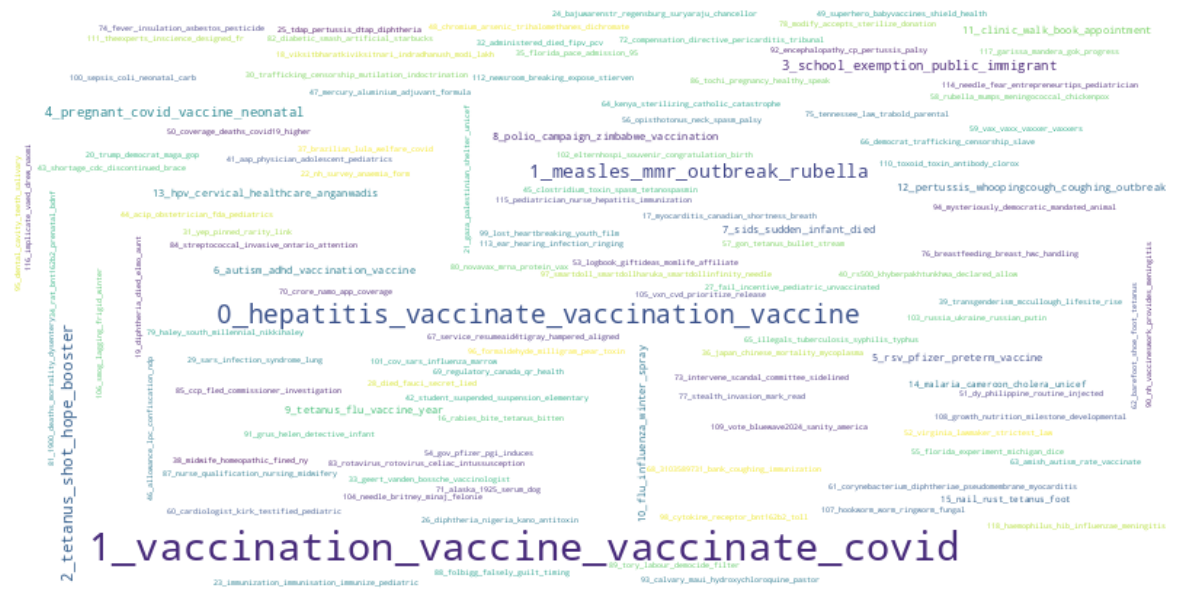

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Prepare the data for the word cloud
# We combine the topic names, repeating them according to their count to affect their size in the word cloud.
text = " ".join((name + " ") * count for name, count in zip(topic_info['Name'], topic_info['Count']))

# Create and generate a word cloud image
wordcloud = WordCloud(width = 800, height = 400,
                      background_color ='white',
                      colormap='viridis',  # You can change the colormap to any you prefer
                      collocations=False).generate(text)

# Display the generated image:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


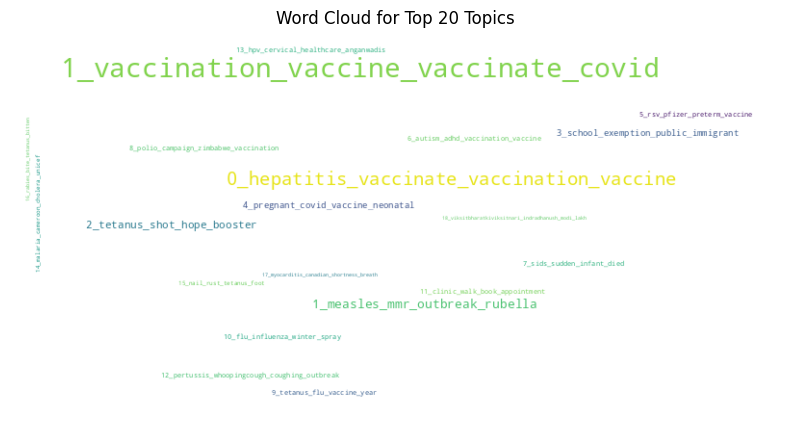

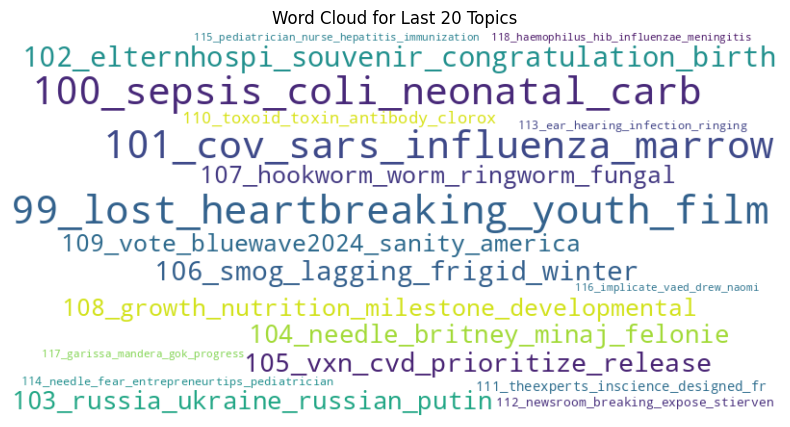

In [58]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming topic_info is your DataFrame with the topics' information
# Sort the DataFrame just in case it's not sorted by counts
topic_info_sorted = topic_info.sort_values(by='Count', ascending=False)

# Selecting the top 20 topics
top_20 = topic_info_sorted.head(20)

# Selecting the last 30 topics
last_20 = topic_info_sorted.tail(20)

# Function to generate and display a word cloud
def generate_word_cloud(topics_df, title):
    text = " ".join((name + " ") * count for name, count in zip(topics_df['Name'], topics_df['Count']))
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', collocations=False).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Generate and display the word cloud for the top 30 topics
generate_word_cloud(top_20, "Word Cloud for Top 20 Topics")

# Generate and display the word cloud for the last 30 topics
generate_word_cloud(last_20, "Word Cloud for Last 20 Topics")


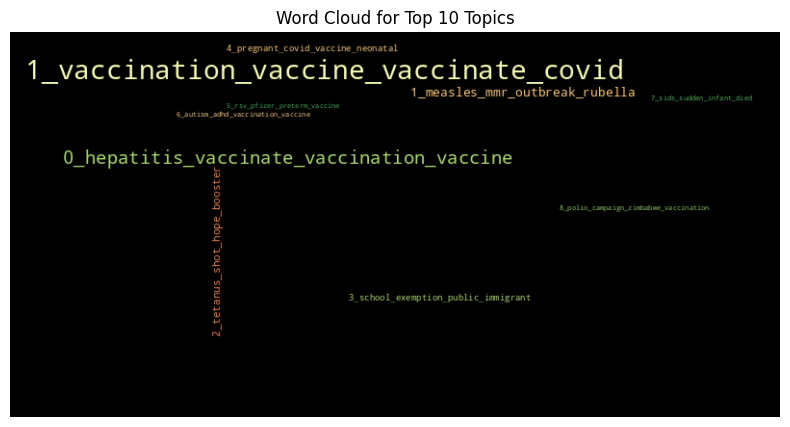

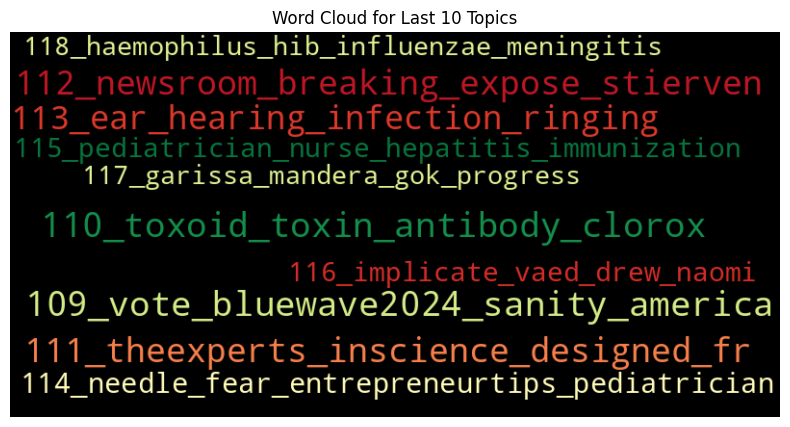

In [66]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming topic_info is your DataFrame with the topics' information
# Sort the DataFrame just in case it's not sorted by counts
topic_info_sorted = topic_info.sort_values(by='Count', ascending=False)

# Selecting the top 20 topics (though your comments mention top 10, so adjust as needed)
top_20 = topic_info_sorted.head(10)  # Adjusted to top 10 as per the provided code

# Selecting the last 30 topics (again, your comments mention last 10)
last_30 = topic_info_sorted.tail(10)  # Adjusted to last 10 as per the provided code

# Function to generate and display a word cloud
def generate_word_cloud(topics_df, title):
    text = " ".join((name + " ") * count for name, count in zip(topics_df['Name'], topics_df['Count']))
    wordcloud = WordCloud(width=800, height=400,
                          background_color='black',
                          colormap='RdYlGn',  # Set to 'Blues' to use shades of blue
                          collocations=False).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Generate and display the word cloud for the top 10 topics
generate_word_cloud(top_20, "Word Cloud for Top 10 Topics")

# Generate and display the word cloud for the last 10 topics
generate_word_cloud(last_30, "Word Cloud for Last 10 Topics")


In [27]:
docs = tweet_list
# Preprocess Documents
documents = pd.DataFrame({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!='']
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
print(coherence)

0.6358184314517278


In [28]:
# Get topic info excluding topic number -1
topic_info = topic_model.get_topic_info()

In [29]:
topic_info.to_csv('Pediatric_120_BTM_topic_info_16April.csv', index = False)

In [33]:
data_tweet['created_at'] = data_tweet['created_at'].astype(str)

## **FINAL TWEETS BY TOPIC**

In [30]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.1 MB/s eta 0:00:00


In [34]:
import pandas as pd
import xlsxwriter as xw
from google.colab import files

# Create a Pandas Excel writer using XlsxWriter as the engine
excel_writer = pd.ExcelWriter('Pediatric_tweet_by_topic_16th_april.xlsx', engine='xlsxwriter')

# Create a dictionary to store dataframes for each topic
dataframes_by_topic = {}

# Iterate over each topic label
for topic_label in range(120):  # Assuming you have 110 topics
    # Find indices of tweets assigned to the current topic
    topic_indices = [index for index, label in enumerate(topics) if label == topic_label]

    # Extract tweet IDs and texts for the current topic
    tweets_topic = data_tweet.iloc[topic_indices, :9]

    # Store the tweets for the current topic in the dictionary
    dataframes_by_topic[topic_label] = tweets_topic

# Write each dataframe to a separate sheet
for topic_label, tweets_topic in dataframes_by_topic.items():
    # Create a sheet name for the current topic
    sheet_name = f"Topic_{topic_label}"

    # Write the dataframe to the Excel file
    tweets_topic.to_excel(excel_writer, sheet_name=sheet_name, index=False)

# Save the Excel file
excel_writer.close()

In [35]:
def get_bert_topics(topic_model, num_topics):
    word_dict = {}
    for i in range(num_topics):
        words=topic_model.get_topic(i)
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    return pd.DataFrame(word_dict)

get_bert_topics(topic_model, len(set(topics))-1)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 110,Topic # 111,Topic # 112,Topic # 113,Topic # 114,Topic # 115,Topic # 116,Topic # 117,Topic # 118,Topic # 119
0,hepatitis,measles,tetanus,school,pregnant,rsv,autism,sids,polio,tetanus,...,vote,toxoid,theexperts,newsroom,ear,needle,pediatrician,implicate,garissa,haemophilus
1,vaccinate,mmr,shot,exemption,covid,pfizer,adhd,sudden,campaign,flu,...,bluewave2024,toxin,inscience,breaking,hearing,fear,nurse,vaed,mandera,hib
2,vaccination,outbreak,hope,public,vaccine,preterm,vaccination,infant,zimbabwe,vaccine,...,sanity,antibody,designed,expose,infection,entrepreneurtips,hepatitis,drew,gok,influenzae
3,vaccine,rubella,booster,immigrant,neonatal,vaccine,vaccine,died,vaccination,year,...,america,clorox,fr,stierven,ringing,pediatrician,immunization,naomi,progress,meningitis
4,covid,unvaccinated,arm,vaccination,placenta,zerohedge,caused,seizure,health,booster,...,vaccinating,pathogen,benefit,prik,earmite,entrepreneurwoman,jayleen,delta,nino,encapsulated
5,polio,catching,stitch,illegal,fetus,syncytial,increase,injury,2024,jab,...,rubella,immunogenicity,effective,newblogpost,earbud,entrepreneurspirit,baby,300,disruption,hennessy
6,smallpox,mumps,antibiotic,ontario,maternal,fda,childhood,cemetery,poliovirus,covid,...,mumps,vaccine,safe,news,infestation,vaccineawareness,hezkiel,pregnant,resumed,bacterial
7,infant,florida,jab,mandatory,flu,cdc,diagnosis,vaccine,paralysis,pox,...,polio,tetanus,pregnant,blog,glomerulonephritis,idea,varelino,disease,rain,parkinson
8,mumps,appointment,injection,child,obstetrician,newborn,mmr,cardiac,virus,immunity,...,measles,immune,risk,community,asthma,childmentalhealth,mayra,covid,infrastructure,epidemiology
9,measles,vaccinated,look,exception,risk,error,evidence,vaccination,somalia,sterilization,...,tinfoil,botulin,vioxx,covid,encephalitis,caregivertips,kayden,vaccine,village,sobel


In [36]:
topics_list = get_bert_topics(topic_model, len(set(topics))-1)
topics_list

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 110,Topic # 111,Topic # 112,Topic # 113,Topic # 114,Topic # 115,Topic # 116,Topic # 117,Topic # 118,Topic # 119
0,hepatitis,measles,tetanus,school,pregnant,rsv,autism,sids,polio,tetanus,...,vote,toxoid,theexperts,newsroom,ear,needle,pediatrician,implicate,garissa,haemophilus
1,vaccinate,mmr,shot,exemption,covid,pfizer,adhd,sudden,campaign,flu,...,bluewave2024,toxin,inscience,breaking,hearing,fear,nurse,vaed,mandera,hib
2,vaccination,outbreak,hope,public,vaccine,preterm,vaccination,infant,zimbabwe,vaccine,...,sanity,antibody,designed,expose,infection,entrepreneurtips,hepatitis,drew,gok,influenzae
3,vaccine,rubella,booster,immigrant,neonatal,vaccine,vaccine,died,vaccination,year,...,america,clorox,fr,stierven,ringing,pediatrician,immunization,naomi,progress,meningitis
4,covid,unvaccinated,arm,vaccination,placenta,zerohedge,caused,seizure,health,booster,...,vaccinating,pathogen,benefit,prik,earmite,entrepreneurwoman,jayleen,delta,nino,encapsulated
5,polio,catching,stitch,illegal,fetus,syncytial,increase,injury,2024,jab,...,rubella,immunogenicity,effective,newblogpost,earbud,entrepreneurspirit,baby,300,disruption,hennessy
6,smallpox,mumps,antibiotic,ontario,maternal,fda,childhood,cemetery,poliovirus,covid,...,mumps,vaccine,safe,news,infestation,vaccineawareness,hezkiel,pregnant,resumed,bacterial
7,infant,florida,jab,mandatory,flu,cdc,diagnosis,vaccine,paralysis,pox,...,polio,tetanus,pregnant,blog,glomerulonephritis,idea,varelino,disease,rain,parkinson
8,mumps,appointment,injection,child,obstetrician,newborn,mmr,cardiac,virus,immunity,...,measles,immune,risk,community,asthma,childmentalhealth,mayra,covid,infrastructure,epidemiology
9,measles,vaccinated,look,exception,risk,error,evidence,vaccination,somalia,sterilization,...,tinfoil,botulin,vioxx,covid,encephalitis,caregivertips,kayden,vaccine,village,sobel


In [37]:
topics_list.to_csv("Final_Topics_list.csv", index = False)

In [38]:
topic_model.visualize_topics()

In [39]:
topic_model.visualize_barchart()

In [40]:
!pip install wordcloud

In [41]:
from wordcloud import WordCloud

In [42]:
def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.figure(figsize=(5, 4), dpi=150)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("On")
    plt.title("Representation of Topic"+" "+ str(topic))
    plt.show()

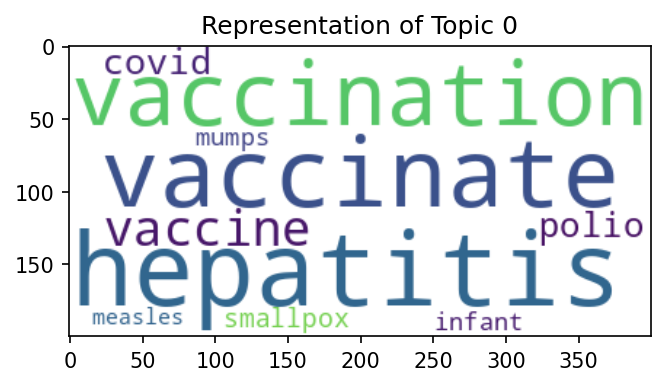

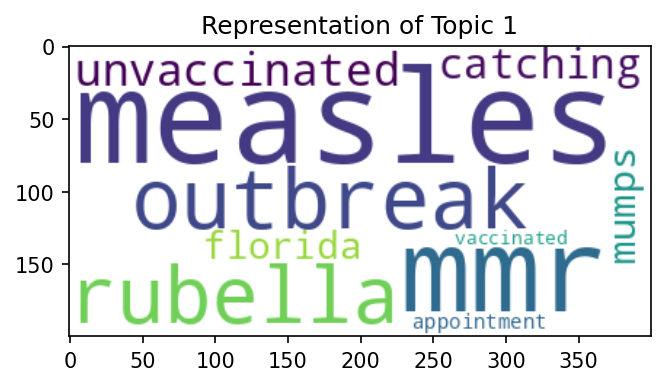

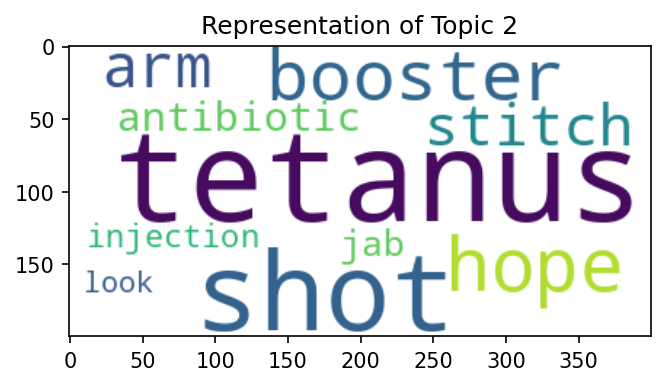

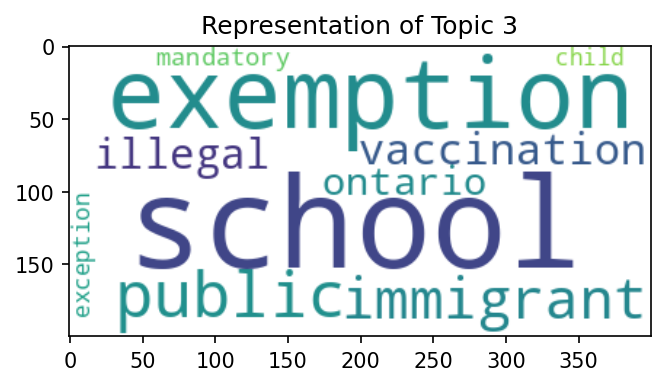

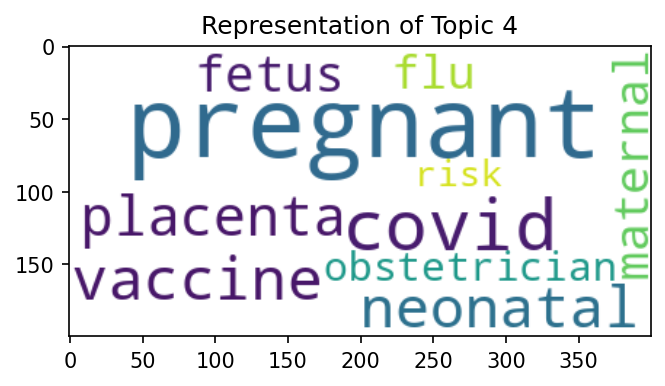

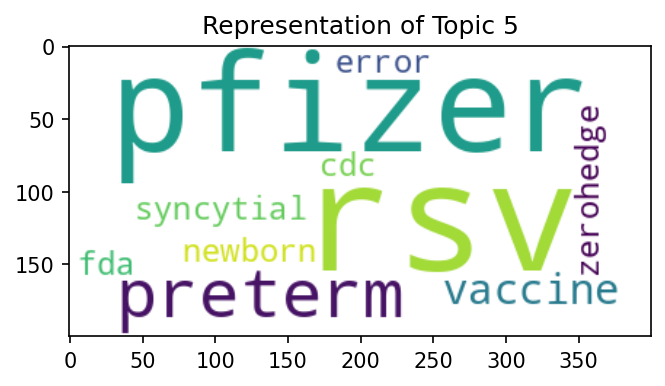

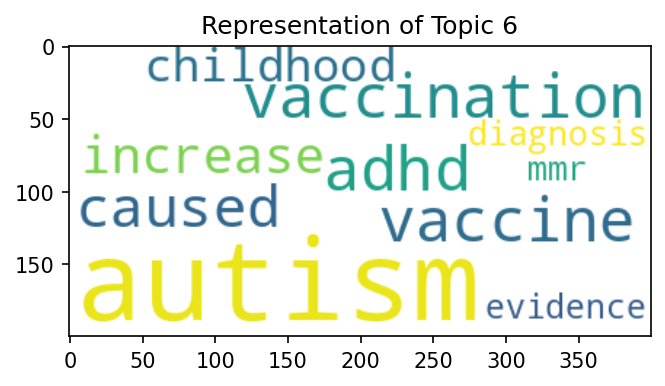

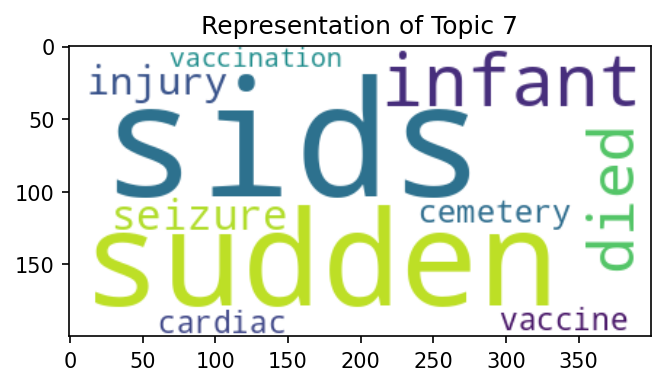

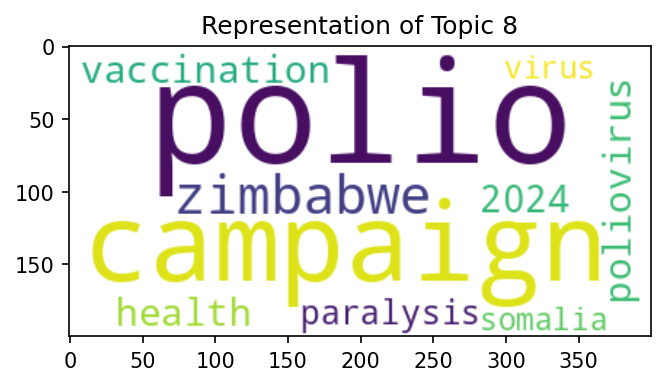

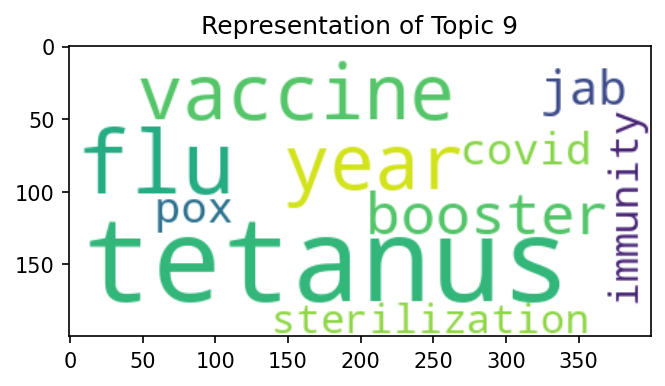

In [43]:
#visualize the top 10 topics
for i in range(0,10):
    create_wordcloud(topic_model, topic=i)

In [44]:
topic_model.visualize_heatmap(top_n_topics=10)

In [45]:
# Extract hierarchical topics and their representations
hierarchical_topics = topic_model.hierarchical_topics(docs)

# Visualize these representations
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 118/118 [00:05<00:00, 21.26it/s]


In [46]:
topics_over_time = topic_model.topics_over_time(tweet_list, timestamp, nr_bins=20)
topics_over_time

20it [00:37,  1.89s/it]


,Topic,Words,Frequency,Timestamp
0,-1,"vaccination, vaccinate, vaccine, covid, health",588,2023-11-04 03:31:23.880999936+00:00
1,0,"mortality, infant, covid, vaccination, vaccine",252,2023-11-04 03:31:23.880999936+00:00
2,1,"measles, mmr, rubella, roble, sleepwalk",18,2023-11-04 03:31:23.880999936+00:00
3,3,"exemption, highest, kindergartner, childhood, ...",61,2023-11-04 03:31:23.880999936+00:00
4,4,"pregnancy, protect, covid, mother, flu",27,2023-11-04 03:31:23.880999936+00:00
...,...,...,...,...
1266,104,"needle, britney, cyanide, syringe, sterile",2,2024-03-04 20:26:44.049999872+00:00
1267,109,"vote, bluewave2024, sanity, america, vaccinating",5,2024-03-04 20:26:44.049999872+00:00
1268,110,"toxoid, toxin, inactivated, immunogenicity, an...",3,2024-03-04 20:26:44.049999872+00:00
1269,111,"inscience, theexperts, designed, nz, trust",2,2024-03-04 20:26:44.049999872+00:00


In [47]:
topic_model.visualize_topics_over_time(topics_over_time, title = '<b>Representation of Topics over Time</b>',height = 450, width = 850)

In [48]:

topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

In [ ]:
#topic_model.visualize_topics_over_time(topics_over_time, title = '<b>Representation of Topics over Time</b>', normalize_frequency= True,height = 450, width = 850)